# INIT

## Import and Install

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import random

## Read DataFrame and Select Columns

In [273]:
df = pd.read_csv('beers.csv')

In [274]:
df = df[['abv', 'ibu', 'style']]

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   abv     2348 non-null   object 
 1   ibu     1405 non-null   float64
 2   style   2405 non-null   object 
dtypes: float64(1), object(2)
memory usage: 56.6+ KB


In [276]:
null_values = df.isnull().sum()
null_values

abv        62
ibu      1005
style       5
dtype: int64

## Prepare Dataset

In [277]:
le = LabelEncoder()
df['style'] = le.fit_transform(df['style'])

In [278]:
for i in range(df.shape[0]):
    abv = str(df.loc[i, 'abv'])
    if(len(abv) > 6):
        abv = abv[:5]
    abv = float(abv)
    df.loc[i, 'abv'] = abv

## Fill NA values

In [279]:
df_dropped = df.dropna()
df_dropped.shape

(1405, 3)

In [280]:
df['abv'] = df['abv'].astype(float)
mean_abv = df['abv'].mean()
std_abv = df['abv'].std()

df['ibu'] = df['ibu'].astype(float)
mean_ibu = df['ibu'].mean()
std_ibu = df['ibu'].std()

for i in range(df.shape[0]):
    abv = str(df.loc[i, 'abv'])
    if(abv == 'nan'):
        abv = random.randrange(int(mean_abv - std_abv), int(mean_abv + std_abv))
        abv = float(abv)
        df.loc[i, 'abv'] = abv
        
    ibu = str(df.loc[i, 'ibu'])
    if(ibu == 'nan'):
        ibu = random.randrange(int(mean_ibu - std_ibu), int(mean_ibu + std_ibu))
        ibu = float(ibu)
        df.loc[i, 'ibu'] = ibu

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   abv     2410 non-null   float64
 1   ibu     2410 non-null   float64
 2   style   2410 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 56.6 KB


In [281]:
def print_data_distribution(df):
    fig, axes = plt.subplots(1, 3, figsize=(14, 6))
    
    # Distribution plot for 'abv'
    sns.histplot(df['abv'], kde=True, ax=axes[0])
    axes[0].set_title('ABV Distribution')
    axes[0].set_xlabel('ABV')
    
    # Distribution plot for 'ibu'
    sns.histplot(df['ibu'], kde=True, ax=axes[1])
    axes[1].set_title('IBU Distribution')
    axes[1].set_xlabel('IBU')
    
    # Distribution plot for 'ibu'
    sns.histplot(df['style'], kde=True, ax=axes[2])
    axes[2].set_title('Style')
    axes[2].set_xlabel('Style')
    
    plt.tight_layout()
    plt.show()

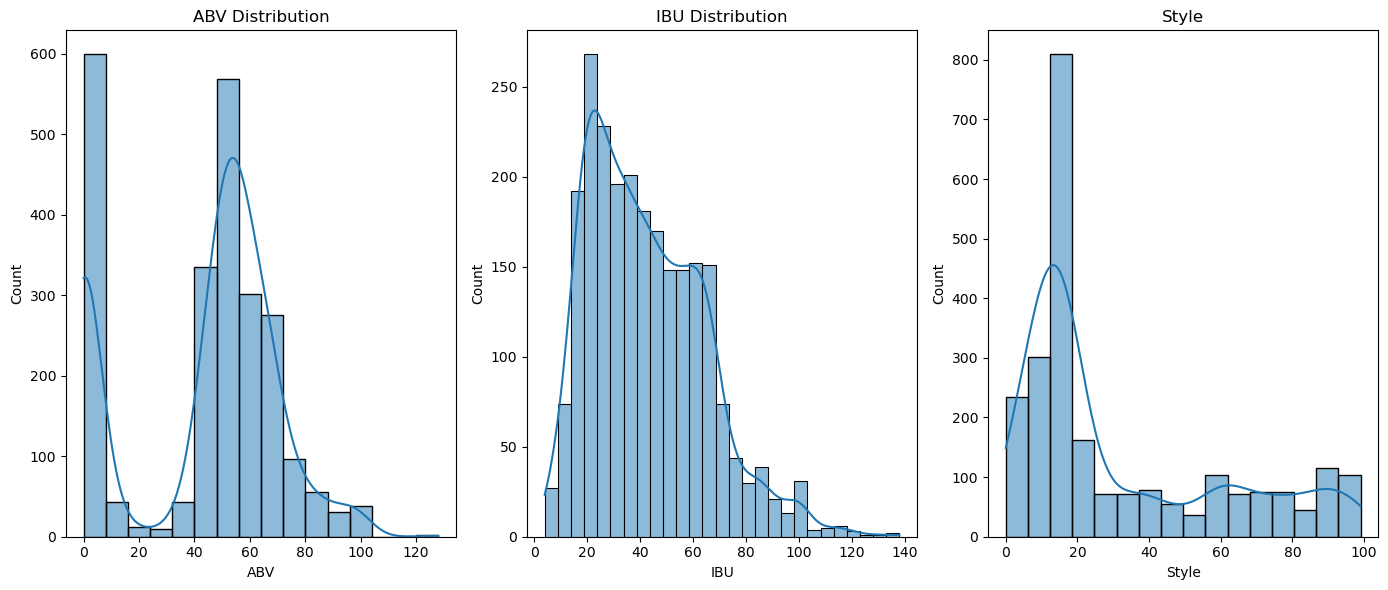

In [282]:
print_data_distribution(df)

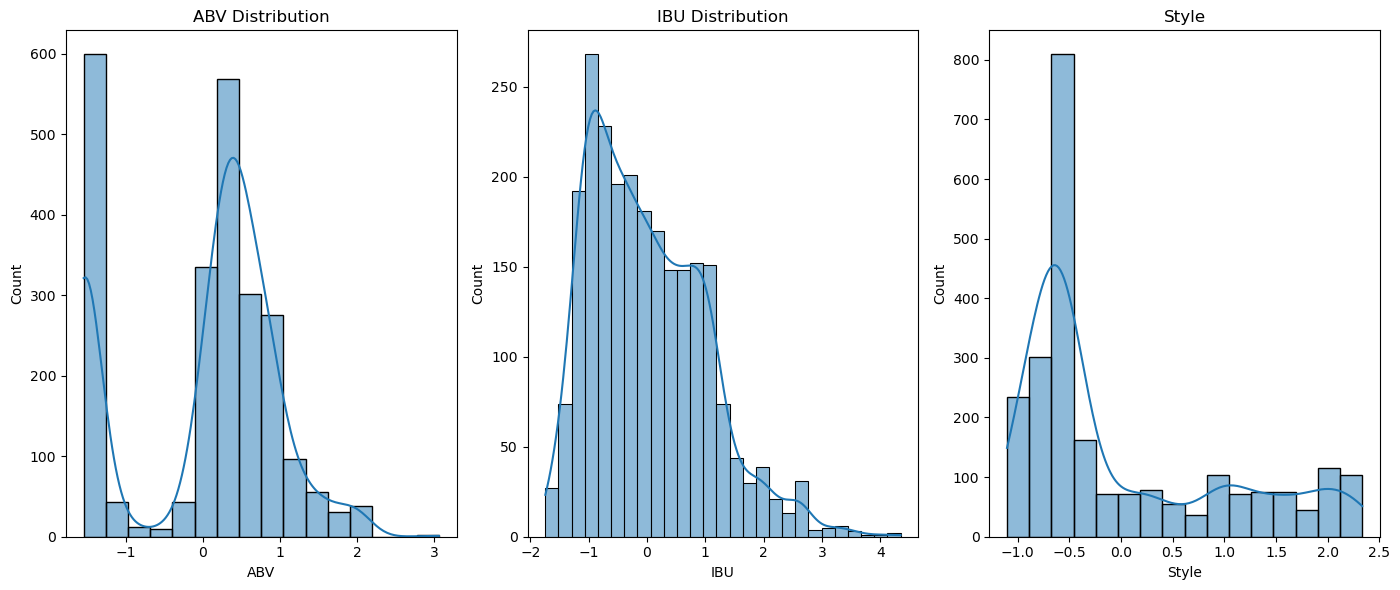

In [283]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
print_data_distribution(df)